In [2]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt
import pandas as pd


data=pd.read_csv('../data/heart_disease.csv')

data=data.values[:,:-1]

data=np.hstack((np.ones((len(data),1)),data))
data=(data-np.mean(data))/np.std(data)

In [45]:
#Random centers
def step_1(k):
    centers = []
    for i in range(k):
        centers.append(data[np.random.randint(0,data.shape[0])])
    #print(centers)
    return centers

In [50]:
#Distances from all centers:
def step_2(centers):
    cluster = []
    distances = []
    for dat in data: #iterate in all points
        dat_distances = []
        for center in centers:
            distances_from_centers = np.linalg.norm(center - dat)
            dat_distances.append(distances_from_centers)
        cluster.append(np.argmin(dat_distances))
        distances.append(dat_distances)
    #print(cluster)
    #print(distances)
    return cluster
        

In [104]:
def step_3(_k,cluster):
    means = []
    for k in range(_k): #goes along with all groups
        data_in_cluster = []
        for ind, c in enumerate(cluster):
            if c == k:
                data_in_cluster.append(data[ind])
        mean = np.mean(data_in_cluster, axis = 0)
        means.append(mean)
        #print(data[cluster == 0])
    return means
        #mean = np.mean()


In [106]:
step = 1
k = 2
centers = step_1(k)
for i in range(step):
    cluster = step_2(centers)
    centers = step_3(k,cluster)

print(cluster)


[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


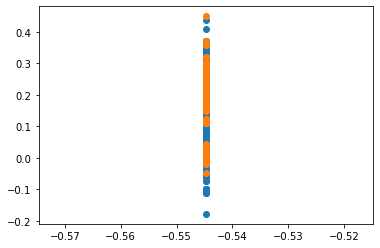

In [107]:
for i in range(k):
    x = []
    y = []

    for ind, c in enumerate(cluster):
        if i == c:
            x.append(data[ind, 0])
            y.append(data[ind, 1])

    plt.plot(x,y,'o')
plt.show()